In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
import sys
from BayDS.lib.training import *

Using TensorFlow backend.
c:\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [3]:
from catboost import CatBoostClassifier

In [30]:
df_train = pd.read_csv('data/onetwotrip_challenge_train.csv')
df_test = pd.read_csv('data/onetwotrip_challenge_test.csv')


In [31]:
df_train['orderid'] = df_train['orderid'] + 1000000

In [32]:
df_train = df_train.set_index('orderid')
df_test = df_test.set_index('orderid')

In [42]:
data = pd.concat([df_train, df_test], axis=0, sort=False )
data.fillna(-1,inplace=True)

In [43]:
data.head()

,userid,field0,field1,field2,field3,field4,field5,field6,field7,field8,...,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
orderid,,,,,,,,,,,,,,,,,,,,,
1000000,10d654494cbe97bbb25d51ead2600679aff9e097924add...,0,-0.626508119430350,11,12,1,1,0,1,1,...,1,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0
1000001,4aafc0391f72bbcf60537aece62923baf9ce644b64ac36...,144,-0.393794036775907,5,7,2,0,0,2,1,...,1,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0
1000002,bac8ffef46348f587c8d17137ab01fb24aef21547c647d...,134,-0.548936758545536,2,3,2,0,0,1,1,...,1,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0
1000003,0392247b4b87674aba2c32bf2292b105771a6a376871be...,0,-0.238651315006278,10,11,1,1,3,2,1,...,1,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0
1000004,d1aeefef311bbeb4bd84876c8d49421f276674527d5578...,0,-0.704079480315165,8,11,1,1,0,1,1,...,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
data.columns

Index(['userid', 'field0', 'field1', 'field2', 'field3', 'field4', 'field5',
       'field6', 'field7', 'field8', 'field9', 'field10', 'field11', 'field12',
       'field13', 'field14', 'field15', 'field16', 'field17', 'field18',
       'field19', 'field20', 'field21', 'field22', 'field23', 'field24',
       'field25', 'field26', 'field27', 'field28', 'field29',
       'indicator_goal21', 'indicator_goal22', 'indicator_goal23',
       'indicator_goal24', 'indicator_goal25', 'goal21', 'goal22', 'goal23',
       'goal24', 'goal25', 'goal1'],
      dtype='object')

In [49]:
X = data[data['goal1']>=0].drop(['goal1'], axis=1)
y = data[data['goal1']>=0]['goal1']
all_features = [f'field{i}' for i in range(30)]
test=data[data['goal1']<0]

In [48]:
from sklearn.model_selection import GroupKFold, KFold

NFOLDS = 5
folds = KFold(n_splits=NFOLDS)
params = {
          'objective': 'binary',
          "metric": 'auc',
          "verbosity": -1,
         }
train_options = {
        "model_type":'lgb',
        "params": params,
        "eval_metric":'auc',
        'early_stopping_rounds': 100,
        'n_estimators': 500,
        'averaging': 'rank',
        'use_groups': False,
        'fold_name': folds.__class__.__name__,
        'n_splits': NFOLDS
    }

Fold 1 started at Tue Dec  3 20:33:18 2019
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.837469	training's auc: 0.837469	valid_1's auc: 0.656873	valid_1's auc: 0.656873
Early stopping, best iteration is:
[24]	training's auc: 0.750451	training's auc: 0.750452	valid_1's auc: 0.65993	valid_1's auc: 0.659929
Fold 2 started at Tue Dec  3 20:33:27 2019
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.835439	training's auc: 0.835439	valid_1's auc: 0.687329	valid_1's auc: 0.687329
Early stopping, best iteration is:
[37]	training's auc: 0.768452	training's auc: 0.768452	valid_1's auc: 0.692398	valid_1's auc: 0.692399
Fold 3 started at Tue Dec  3 20:33:36 2019
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.834981	training's auc: 0.834981	valid_1's auc: 0.689668	valid_1's auc: 0.689668
Early stopping, best iteration is:
[37]	training's auc: 0.767975	training's auc: 0.767975	valid

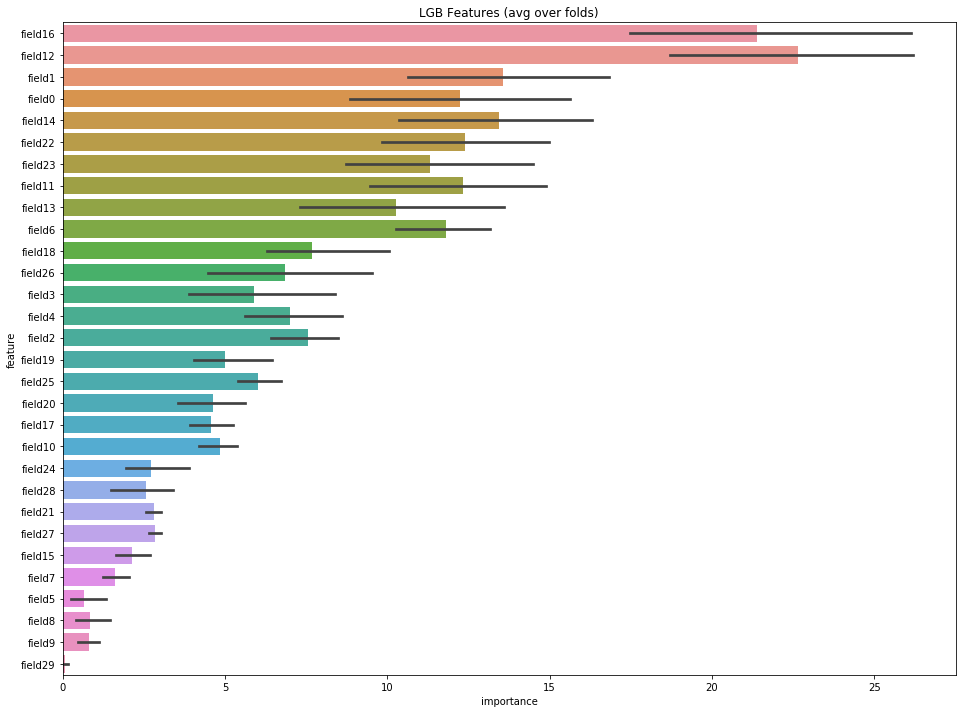

In [50]:
result_dict = train_model_classification_vb( X=X, 
                                             X_test=test, 
                                             columns=all_features,
                                             y=y, 
                                             params=params, folds=folds,
                                             model_type=train_options['model_type'], 
                                             plot_feature_importance=True,
                                             verbose=100, early_stopping_rounds=train_options['early_stopping_rounds'],
                                             n_estimators=train_options['n_estimators'], 
                                             averaging=train_options['averaging'],
                                             n_jobs=-1)

In [53]:
result_dict['prediction'].shape

(455011, 1)

In [60]:
result_dict

{'oof': array([[0.01211469],
        [0.0541382 ],
        [0.00783744],
        ...,
        [0.01507588],
        [0.0350514 ],
        [0.02399657]]), 'prediction': array([[ 40209.6],
        [ 69254.2],
        [364665.7],
        ...,
        [175022.6],
        [418019.4],
        [148997.5]]), 'scores': [0.6599300785380952,
  0.692398096091999,
  0.6958018352984057,
  0.6728046008112054,
  0.6814938026186262], 'feature_importance':     feature          importance  fold
 0    field0   6.600000000000000     1
 1    field1   8.199999999999999     1
 2    field2   5.600000000000000     1
 3    field3   2.800000000000000     1
 4    field4   4.400000000000000     1
 ..      ...                 ...   ...
 25  field25   7.200000000000000     5
 26  field26  11.400000000000000     5
 27  field27   3.000000000000000     5
 28  field28   3.800000000000000     5
 29  field29   0.200000000000000     5
 
 [150 rows x 3 columns], 'top_columns': Index(['field12', 'field16', 'field1', 'field14'

In [55]:
test['proba'] = result_dict['prediction']

In [56]:
sub = pd.read_csv('data/onetwotrip_challenge_sub1.csv')

In [61]:
sub['proba'] = test['proba'] / test['proba'].max()

In [62]:
sub

,orderid,proba
0,0,0.088375369379091
1,1,0.152211549133875
2,2,0.801486857302360
3,3,0.759910898455229
4,4,0.036018211529353
5,5,0.268502032477887
6,6,0.525514713073904
7,7,0.469195020072024
8,8,0.779645989496392
9,9,0.438586419597065


In [70]:
sub.reset_index(drop=True).set_index('orderid').to_csv('submissions/0312.csv')